In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
import warnings  
warnings.filterwarnings( "ignore" ) 
data=pd.read_csv('heart_failure_clinical_records_dataset.csv',header=0)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


In [3]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [4]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
print(data.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [18]:
data= data.astype({'age': 'int64', 'platelets': 'int64'})
print(data.dtypes)

age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                     int64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


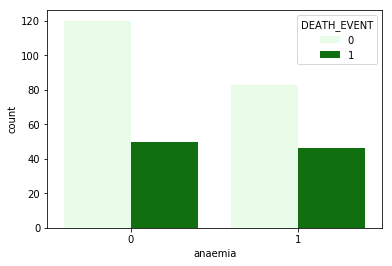

In [6]:
sns.countplot(x="anaemia", hue="DEATH_EVENT", color="green", data=data)

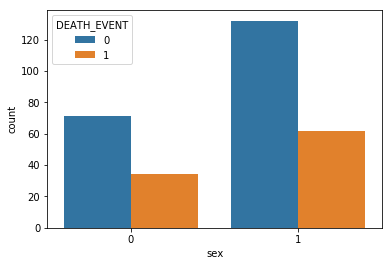

In [7]:
sns.countplot(x="sex", hue="DEATH_EVENT", data=data)

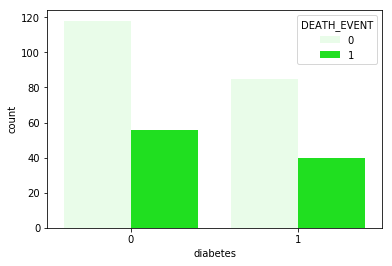

In [8]:
sns.countplot(x="diabetes", hue="DEATH_EVENT", color="lime", data=data)

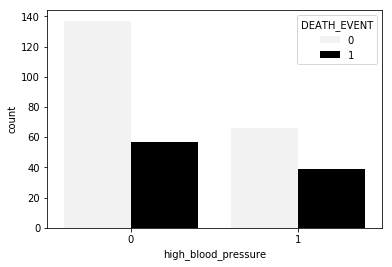

In [9]:
sns.countplot(x="high_blood_pressure", hue="DEATH_EVENT", color="black", data=data)

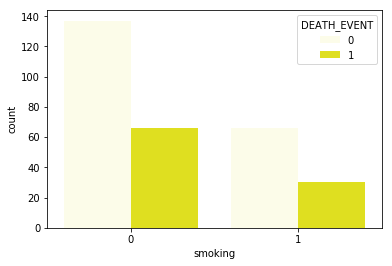

In [10]:
sns.countplot(x="smoking", hue="DEATH_EVENT", color="yellow", data=data)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

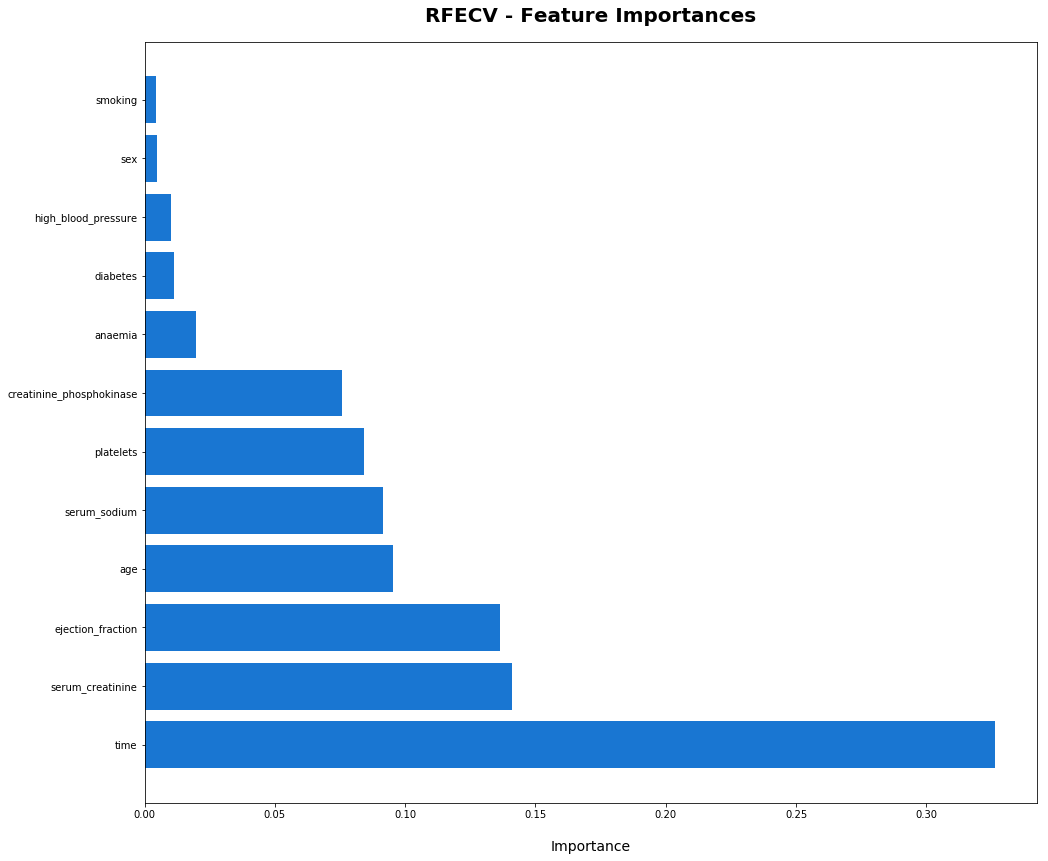

In [12]:
X = data.drop('DEATH_EVENT', axis=1)
target = data['DEATH_EVENT']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, target)
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

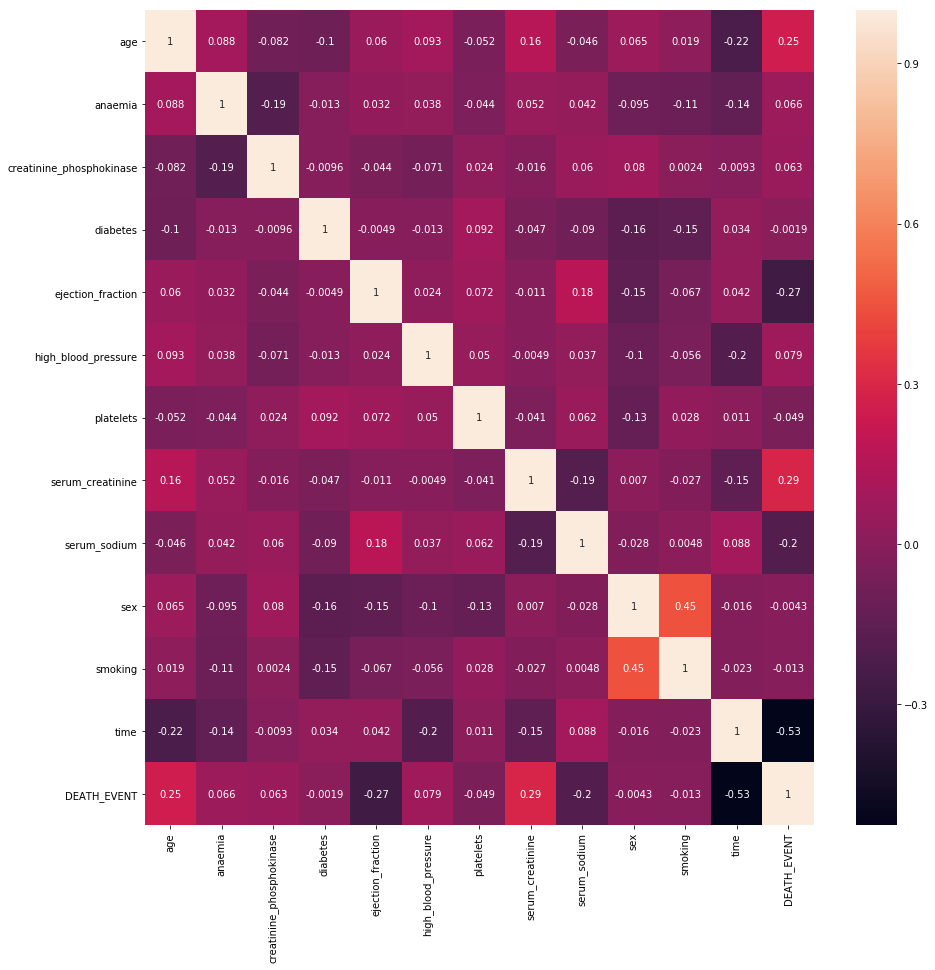

In [13]:
plt.figure(figsize=(15,15))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Accuracy on test set by logistic regression model       :   82.66666666666667
[[55  0]
 [13  7]]


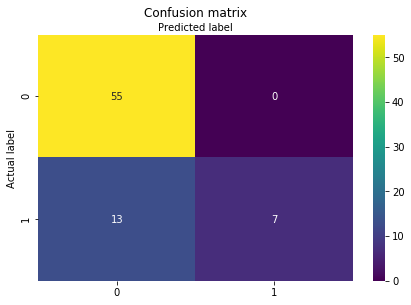

In [14]:
# Logistic Regression 
class Logistic_Regression() : 
    def __init__( self, learning_rate, iterations ) :         
        self.learning_rate = learning_rate         
        self.iterations = iterations 
          
    # Function for model training     
    def fit( self, X, Y ) :         
        # no_of_training_examples, no_of_features         
        self.m, self.n = X.shape         
        # weight initialization         
        self.W = np.zeros( self.n )         
        self.b = 0        
        self.X = X         
        self.Y = Y 
          
        # gradient descent learning 
                  
        for i in range( self.iterations ) :             
            self.update_weights()             
        return self
      
    # Helper function to update weights in gradient descent 
      
    def update_weights( self ) :            
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) ) 
          
        # calculate gradients         
        tmp = ( A - self.Y.T )         
        tmp = np.reshape( tmp, self.m )         
        dW = np.dot( self.X.T, tmp ) / self.m          
        db = np.sum( tmp ) / self.m  
          
        # update weights     
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db 
          
        return self
      
    # Hypothetical function  h( x )  
      
    def predict( self, X ) :     
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )         
        Y = np.where( Z > 0.5, 1, 0 )         
        return Y 

    
def main() : 
    #selecting the features from correlation matrix
    x=data[['time', 'serum_creatinine', 'ejection_fraction' ,'age' ,'serum_sodium']]
    X = x.iloc[:,:].values 
    Y = data.iloc[:,-1:].values 
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split( 
      X, Y, test_size = 0.25, random_state = 10 ) 
      
    # Model training     
    model = Logistic_Regression( learning_rate = 0.01, iterations = 1000 ) 
      
    model.fit( X_train, Y_train )      
      
    # Prediction on test set 
    Y_pred = model.predict( X_test )     
      
    # measure performance     
    correctly_classified = 0    
      
    # counter     
    count = 0    
    for count in range( np.size( Y_pred ) ) :   
        if Y_test[count] == Y_pred[count] :             
            correctly_classified = correctly_classified + 1
        count = count + 1
    print( "Accuracy on test set by logistic regression model       :  ", (  
      correctly_classified / count ) * 100 ) 
    
    #DISPLAYING CONFUSION MATRIX
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(Y_test, Y_pred)
    print(confusion_matrix)
    
    #DISPLAYING CONFUSION MATRIX IN GRAPH
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(data))
    plt.xticks(tick_marks, data)
    plt.yticks(tick_marks, data)
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="viridis" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')  

    
if __name__ == "__main__" :      
    main()